$$\LARGE\textbf{Statistics for Artificial Intelligence & Data Science}$$

$$\Large\textbf{Bridge Analysis}$$

$$\large\textbf{Daniel Elston}$$

$$\newline$$

$\large\textbf{Part 1: Data Preperation}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

$$\newline$$

The dataset is loaded in. Furthermore, some basic information regarding the dataset is retrieved, in order to see more clearly which information could be relevant to the analysis.

In [2]:
load = pd.read_csv('tx19_bridges_sample.csv')
load

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


In [3]:
for col in load:
    print(load[col].unique())

['000021521-00101' '000021521-00181' '000021521-TMP20' ...
 'DAPFORHOO000015' 'DAPFORHOO00005A' 'DAPTRABLI000011']
['District2' 'District1' 'District3' 'District4' 'District5' 'District6'
 'District7' 'District8' 'District11' 'District17' 'District9' 'District0'
 'District10' 'District12' 'District13' 'District14' 'District15'
 'District16' 'District18' 'District19' 'District20' 'District21'
 'District22' 'District23' 'District24' 'District25' 'District48']
[199   6   3   8  10  11   2   5  32  26  16  19  14  13   0  24  18  45
  90  34  29  23 159  35  40  21  27  93 145  37  53  31  48  43  88  55
  39  42  61  69  56  47  50  51  80  60  58 119  84 101  76 158 105 100
  77 109 134  71 132  66 117  72  64 113 121 130  97  74  82   9  12   4
 999   1  63  85  87  95  79 114 150  98  68 126 103 116 106]
['Free' 'Toll']
['Agency' 'State' 'County' 'Town or City' 'Unknown' 'Toll Authority'
 'Private' 'Military' 'Railroad']
['Rural' 'Urban']
['Local' 'Arterial' 'Minor' 'Interstate']
[2005

In [4]:
load.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34293 entries, 0 to 34292
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Structure_id     34293 non-null  object 
 1   District         34293 non-null  object 
 2   Detour_Km        34293 non-null  int64  
 3   Toll             34293 non-null  object 
 4   Maintainer       34293 non-null  object 
 5   Urban            34293 non-null  object 
 6   Status           34293 non-null  object 
 7   Year             34293 non-null  int64  
 8   Lanes_on         34293 non-null  int64  
 9   Lanes_under      34293 non-null  int64  
 10  AverageDaily     34293 non-null  int64  
 11  Historic         34293 non-null  object 
 12  Service_under    34293 non-null  object 
 13  Material         34293 non-null  object 
 14  Design           34293 non-null  object 
 15  Spans            34293 non-null  int64  
 16  Length           34293 non-null  float64
 17  Width       

In [5]:
list(load)

['Structure_id',
 'District',
 'Detour_Km',
 'Toll',
 'Maintainer',
 'Urban',
 'Status',
 'Year',
 'Lanes_on',
 'Lanes_under',
 'AverageDaily',
 'Historic',
 'Service_under',
 'Material',
 'Design',
 'Spans',
 'Length',
 'Width',
 'Deck_rating',
 'Superstr_rating',
 'Substr_rating',
 'Rated_load',
 'Trucks_percent',
 'Scour_rating',
 'Future_traffic']

$$\newline$$

The aim of this analysis is to **Investigate variables to predict current condition of bridges**. To accomplish this, the table will first be trimmed down so that only information useful to this analysis remains, shown in the table below.

In [6]:
df = load[['Year','AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Historic']]
df

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic
0,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic
1,2005,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic
2,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic
3,1950,80,0.0,Timber,Beam,Good,Good,Poor,Not historic
4,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic
...,...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,Good,Good,Good,Not historic
34289,2000,300,40.0,Concrete,Beam,Good,Good,Good,Not historic
34290,1996,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic
34291,1991,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic


In [7]:
age = 2021 - df['Year']
df2 = df.assign(Age = age)

In [8]:
df3 = df2.drop(columns='Year')
df3

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic,Age
0,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic,16
1,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic,16
2,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic,9
3,80,0.0,Timber,Beam,Good,Good,Poor,Not historic,71
4,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic,17
...,...,...,...,...,...,...,...,...,...
34288,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,27
34289,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,21
34290,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic,25
34291,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic,30


$$\newline$$

The table above will now be processed further to give more insightful attributes.

In [9]:
oldbridges_reg = df3.loc[(df['Historic'] == 'Register')]
oldbridges_poss = df3.loc[(df['Historic'] == 'Possible')]
oldbridges_unk = df3.loc[(df['Historic'] == 'Unknown')]

In [10]:
oldbridges_reg.describe().round()

,AverageDaily,Trucks_percent,Age
count,417.0,417.0,417.0
mean,5255.0,6.0,82.0
std,8722.0,10.0,18.0
min,1.0,0.0,3.0
25%,100.0,0.0,72.0
50%,1160.0,0.0,83.0
75%,6640.0,9.0,91.0
max,52900.0,55.0,121.0


In [11]:
oldbridges_poss.describe().round()

,AverageDaily,Trucks_percent,Age
count,13906.0,13906.0,13906.0
mean,11425.0,12.0,63.0
std,22204.0,12.0,14.0
min,1.0,0.0,3.0
25%,660.0,2.0,52.0
50%,3800.0,10.0,59.0
75%,11695.0,18.0,70.0
max,310480.0,90.0,121.0


In [12]:
oldbridges_unk.describe().round()

,AverageDaily,Trucks_percent,Age
count,58.0,58.0,58.0
mean,39651.0,5.0,19.0
std,70010.0,6.0,21.0
min,20.0,0.0,4.0
25%,85.0,0.0,5.0
50%,8550.0,5.0,5.0
75%,52250.0,7.0,43.0
max,273500.0,20.0,61.0


Looking at the statistics for ages of 'Registered' historic bridges compared to 'Possible' and 'Unknown' historic bridges, there are clearly some bridges that we cannot consider 'old'. For example, there is a bridge less than 3 years old in each dataset. Removing the outliers from this dataset by combining the upper quartile (75% = 72 years) of Registered historic bridges and the lower quartile (25% = 70 years) of Possible historic bridges, an average was taken, resulting in the decision to remove any bridges over the age of 71. There are no bridges in the 'Unknown' category over 61, so this can be disregarded. This results in **all bridges over the age of 71 being removed from the dataset**

In [13]:
oldbridges = df3.loc[(df3['Age']>71)]

In [14]:
remove_list = list(oldbridges.index.values)

In [15]:
df4 = df3.drop(
    labels = remove_list,
    axis=0,
    inplace = False
)
df4

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic,Age
0,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic,16
1,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic,16
2,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic,9
3,80,0.0,Timber,Beam,Good,Good,Poor,Not historic,71
4,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic,17
...,...,...,...,...,...,...,...,...,...
34288,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,27
34289,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,21
34290,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic,25
34291,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic,30


$$\newline$$

There exist some very small categories within the 'Material' and 'Design' attributes. In order to sort data further, categories with low counts will be combined in to the 'Other' category, or removed altogther. Below shows some figures to easily see small categories. 

In [16]:
df5 = df4.replace(['Timber', 'Masonry', 'Truss', 'Arch', 'Suspension', 'Frame', 'Movable'], 
                     ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other']) 
df5

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic,Age
0,1,0.0,Concrete,Slab,Good,Very Good,Very Good,Not historic,16
1,1,0.0,Concrete,Slab,Good,Good,Very Good,Not historic,16
2,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,Not historic,9
3,80,0.0,Other,Beam,Good,Good,Poor,Not historic,71
4,150,4.0,Concrete,Beam,Good,Very Good,Very Good,Not historic,17
...,...,...,...,...,...,...,...,...,...
34288,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,27
34289,300,40.0,Concrete,Beam,Good,Good,Good,Not historic,21
34290,1200,25.0,Concrete,Beam,Good,Good,Good,Not historic,25
34291,300,15.0,Concrete,Beam,Good,Good,Satisfactory,Not historic,30


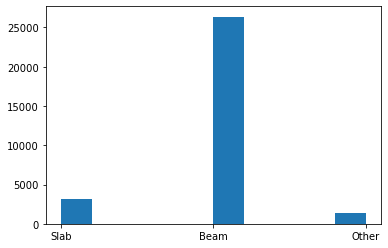

In [17]:
axis1 = [df5.iloc[:,3]]
plt.hist(axis1, bins = 10)
plt.show()

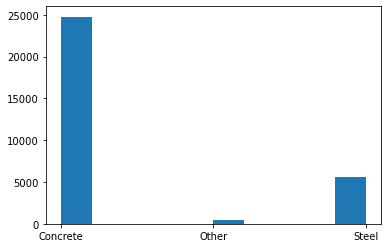

In [18]:
axis2 = [df5.iloc[:,2]]
plt.hist(axis2, bins = 10)
plt.show()

In [ ]:
ax = df5.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("Material", fontsize=18)
plt.show()

In [ ]:
a = axe
print

The current condition should be derived from the combination of the three main
condition variables (ignore 'scour'), by treating each as an integer score (0 for failed)
and adding the three scores. This means that the regression (part 2) is on a
continuous variable.
- Failed, failing, critical, serious, poor, satisfactory, fair, good, very good, excellent
- 0,       1,         2,        3,     4,        5,        6,     7,     8,  9,      10

The condition of a bridge has been considered. By combing the score of a bridge (0 being failed 10 being excellent condition) from the attributes deck, superstr and substr rating

In [ ]:
rating1 = df5.replace(['Failed', 'Failing', 'Critical', 'Serious', 'Serious', 'Poor', 'Satisfactory', 'Fair', 'Good', 'Very Good', 'Excellent'], 
                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
rating1

In [ ]:
rating2 = (rating1['Deck_rating']+rating1['Superstr_rating']+rating1['Substr_rating'])/3
rating2

In [ ]:
rating = pd.DataFrame().assign(Rating = rating2)
rating.round(2)

In [ ]:
df6 = df5.assign(Rating = rating.round(2))
df6

In [ ]:
df7 = df6[['AverageDaily','Trucks_percent', 'Material', 'Design', 'Historic', 'Age', 'Rating']]
df7

$$\newline$$

$\large\textbf{Part 2: Exploratory Analysis}$

You should look at the relationship between the five predictor variables and the target
variable. You should also look at and comment on the relationship between the predictors.
You should draw preliminary conclusions at the end of this part of the analysis on the
answers to the questions asked by the Texas Department of Transportation. 

HINT: The variables are a mix of continuous and categorical. You need to use appropriate
techniques to explore the relationship between continuous variables, between
continuous and categorical variables and between categorical variables. 

- Predict current conditions of bridges!

5 Variables: Comment on each
- Age, intuitively should have a large weighting
- Avg Daily, almost as important as age, this is a direct measure of the bridges use
- Trucks_percent, assuming each truck weights approx. 3 cars, (neglecting stress factors), this will have a further impact on condition
- Material, 
- Design

Here we will be exploring the relationship between 

In [ ]:
plot(x, y, 'go--', linewidth=2, markersize=12)
plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [ ]:
df7.plot(x ='Age', y='Rating', kind = 'scatter')

In [ ]:
plt.hist(df7["Age"])
plt.show()

In [ ]:
plt.scatter(df7['Age'], df7['Rating'], color='red', s=0.1)
plt.show()

#(x, y, color='green', marker='o', linestyle='dashed',
#...      linewidth=2, markersize=12)

In [ ]:
fig, (a1, a2, a3) = plt.subplots(3, 1, figsize = (20, 10))

df7.pivot_table(values='Age', index='Rating', aggfunc='count').plot(ax=a1, kind='bar', logy=True, legend=False)
df7.pivot_table(values='Age', index='Rating', aggfunc='count').plot(ax=a2, kind='bar', logy=True, legend=False)
df7.pivot_table(values='Age', index='Rating', aggfunc='count').plot(ax=a3, kind='bar', logy=False, legend=False)